# Project on Boston House Prices dataset

This assessment is based on well-known Boston House Price dataset. I am planning on utilizing Python packages scipy, Keras, and this jupyter notebook to complete it. I am going to use descriptive statistics and plots to describe the Boston House Prices dataset. I will also use inferential statistics to analyse whether there is difference in median house prices amongst the houses located along the Charles river and those that are not. In the final section when the dataset it clearly described i will create a nueral network using Keras in order to predict median house prices based on the dataset variables.

The assessment structure is as follow:
1. Importing the Boston House Price Dataset
2. Understanding the Data within the Dataset (Descriptive Statistics)
3. Look for patterns
4. Inferential statistics to analyse House prices along the river
5. T-test 
6. Nueral Network Model

In [185]:
#Importing necessary packages

#Numpy is general-purpose array-processing package
import numpy as np
#Panda package for data manipulation and analysis which i will need for the dataset
import pandas as pd
#Scipy.stats package contains a large number of probability distributions and statistical functions
import scipy.stats as ss
#Seaborn is a statistical data visualization package
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for the notebook
%matplotlib inline

#Library for Keras and Tenserflow to create Nueral Network 
import tensorflow as tf 
import keras as kr
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Importing the Dataset

In [186]:
#Downloading the dataset
from sklearn.datasets import load_boston

In [187]:
boston = load_boston()

In [188]:
#First look into the dataset
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The dataset appears to be 2D NumPy array.

In [189]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [190]:
#list of all the keys in the dictionary(field names)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [191]:
data = boston.data
type(data)

numpy.ndarray

In [192]:
#converting it to pandas dataframe 
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330


In [193]:
#including the the median house price column as its not in the features
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


Panda library inserts NaN for any missing data. It is good practice to clean the data by removing any NaN.

In [194]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

For this dataset there is no NaN values. I can move on to the next step.

##  Understanding the Data within the Dataset (Descriptive Statistics)

In order to better understand the data and to be able later to justify my results the first section of this assignment will be based on me familiarizing myself with the Boston Housing Data. This will be evident through describing the dataset by code and demonstrating its features and target variables. 

Boston House Prices Dataset is derived from information collected by the U.S. Census Service in 1978 which describes housing in various suburbs of Boston, Massachusetts. 
The Boston Housing Dataset potrays the prices of houses in Boston based of various variables such as:
- (CRIM) crime
- (ZN) residential land zone for lots larder than 25,000 sq.ft. 
- (INDUS) areas of non-retail business in the town
- (CHAS) Charles river dummy variable (track bounds river=1, otherwise 0)
- (NOX) nitric oxides concentration  
- (RM) number of rooms per house
- (AGE) the age of people who own the house
- (DIS) distance to five Boston employment centers
- (RAD) index of accessability to highways
- (TAX) full-value property-tax rate per 10,000 dollars
- (PTRATIO) pupil teacher ratio by town
- (B) people of African America descent by town
- (LSTAT) percentage lower status of the population
- (Price) Median value of owner-occupied homes in $1000's.

Dataset contains of 506 rows and 14 rows : $$ X(506 x 14) $$.



In [195]:
data.shape

(506, 14)

The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.

why have they only focused on those features?
https://www.ritchieng.com/machine-learning-project-boston-home-prices/

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

In [196]:
#understanding the data by accessig the statistical details
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


This table gives a high-level idea of how everything is distributed. This code compiles various properties including the mean, standard deviation, minimum, and maximum for each column. 
From the table we can see that NOX (nitric oxides concentration) has a very small mean variable compare to INDUS (areas of non-retail business in the town) or ZN (residential land zone for lots larder than 25,000 sq.ft.). Meaning that INDUS and ZN most likely have a higher dominance over the averrag house price. 

In this section, I will use some visualizations plots to understand the relationship of the target variable with other features.Plotting the distribution of the median value of the house prices ('Price') with distplot function from the seaborn library will help me visualize what distribution it has. In the below histogram plot we can see that 'Price' values are distributted normally with some outliers. Most of the houses in $1000 are around that 20 to 25 range.

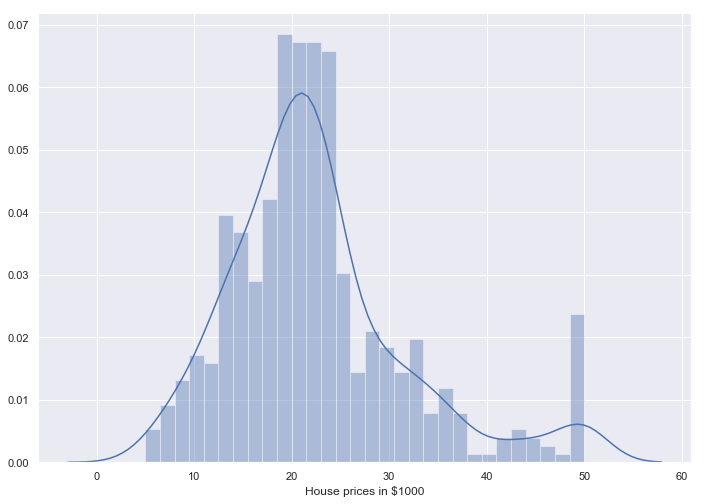

In [197]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Price'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

describe the data you see above here

The type of each column is a float there is a total of 14 columns with 506 entries.

https://www.youtube.com/watch?v=ZeM2tHtjGy4
    
keras 
https://www.youtube.com/watch?v=UJwK6jAStmg 

### Correlation / linear regression of the dataset

The below table measures the linear relationships between the variables. Large positive scores between the features show that there is a strong positive correlation. We see a maximum of value 1 in all the diagonal values. 

There are various ways to implement linear regression, either using scikit-learn, stats model, numpy, or scipy

Data correlation is very important when building neural network. 

In [198]:
pd.options.display.float_format = '{:,.3f}'.format #for visualisation I am setting the values to 3 decimals
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors. Colors help us understand the relation amongst numbers faster. For example, dark blue shows very strong correlation which is represented by 1 and very light colour nearly white show teh negative correlation -0.6. 

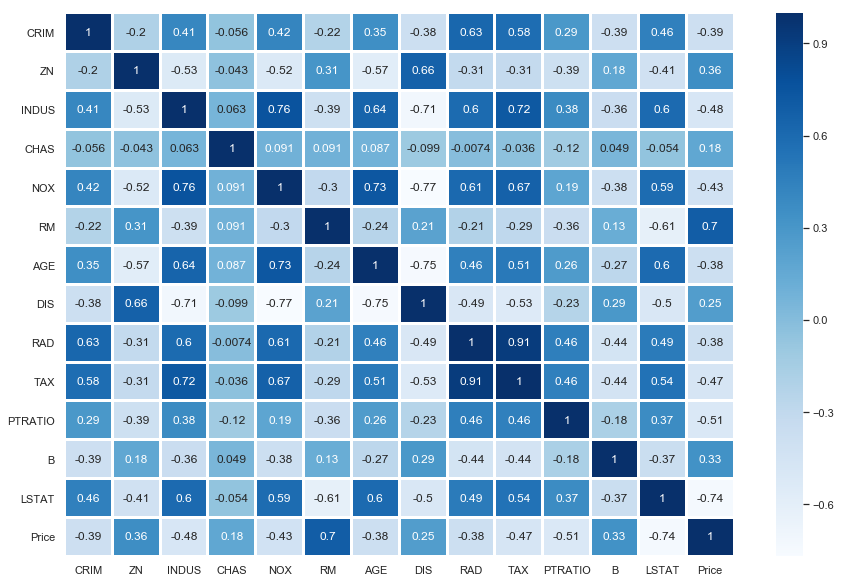

In [199]:
#using heatmap we are just turning already esxistent raw data into nicely fomatted user firendly graph

large_correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(large_correlation, annot=True, linewidths=2, linecolor='white', cmap="Blues")

Looking at the correlation we can understand the datatset in more detail. If we look at the last column 'Price' we can see the variables that have negative impact on the 'Price'; it makes teh house price go down. For example, 'LSTAT', 'PTRATIO', 'TAX' and 'CRIME' have -0.74, -0.51, -0.47 and -0.39 negative correlation which gives us an idea why house prices go down. On the other hand, 'RM' rooms is highlighting that increasing number of rooms has a strong positive effect on the price of a house in the Boston area. As this is the highest correlation value out of all 13 variables examined, we can say that number of rooms is the strongest indicator of house price for this set of data.

I have chosen already brefiely described variables along with the house price variable to show a range of correlations between them in the dataset:

- (LSTAT) percentage lower status of the population (homeowners that are considered lower class)
- (TAX) full-value property-tax rate per 10,000 dollars
- (PTRATIO) pupil teacher ratio by town
- (CRIM) crime
- (RM) number of rooms per house
- (Price) median house price

In [200]:
sample = ['RM', 'LSTAT', 'TAX', 'PTRATIO','CRIM', 'Price'] 
data[sample].head()

,RM,LSTAT,TAX,PTRATIO,CRIM,Price
0,6.575,4.980,296.000,15.300,0.006,24.000
1,6.421,9.140,242.000,17.800,0.027,21.600
2,7.185,4.030,242.000,17.800,0.027,34.700
3,6.998,2.940,222.000,18.700,0.032,33.400
4,7.147,5.330,222.000,18.700,0.069,36.200


Using hetamap we can cloesly see the correlation between chosen variables.

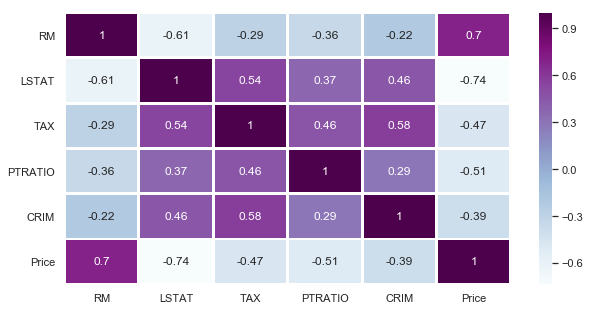

In [201]:
sample_correlation = data[sample].corr()
plt.figure(figsize=(10,5))
sns.heatmap(sample_correlation, annot=True, linewidths=2, linecolor='white', cmap="BuPu")

One way to further explore the correlations seen in the heatmap above is to use skatterplot. This would allow us to see the shape of the relationship and compare it against the trend line. Below is a matrix of 36 scatter plots representing each of the correlation seen in the heatmap above. Most important is how each variable correlates with price which can be seen on the right far column of graphs.

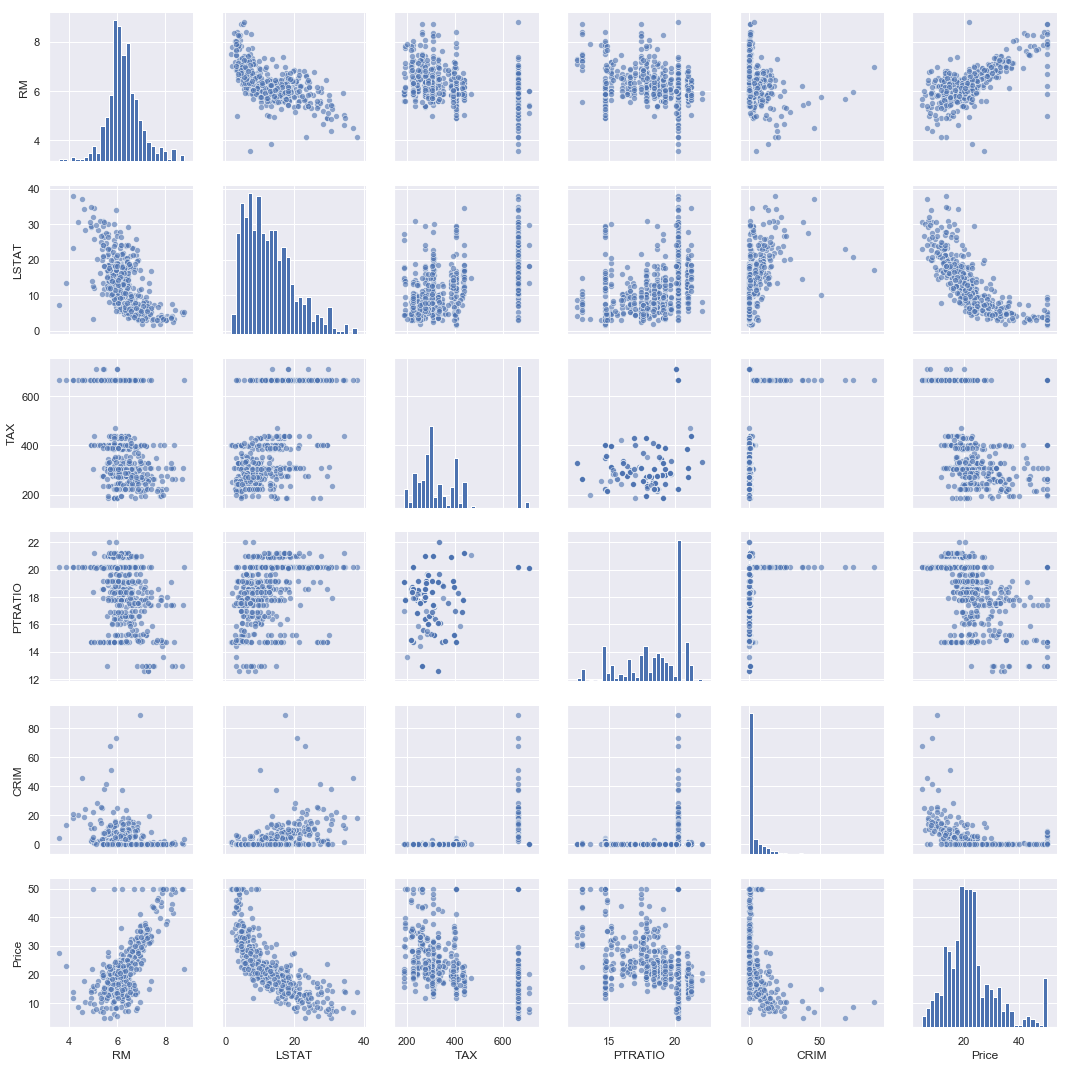

In [202]:
sns.pairplot(data[sample],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 

We can take a closer look at some of the relationships below:

#### Using linear regression 


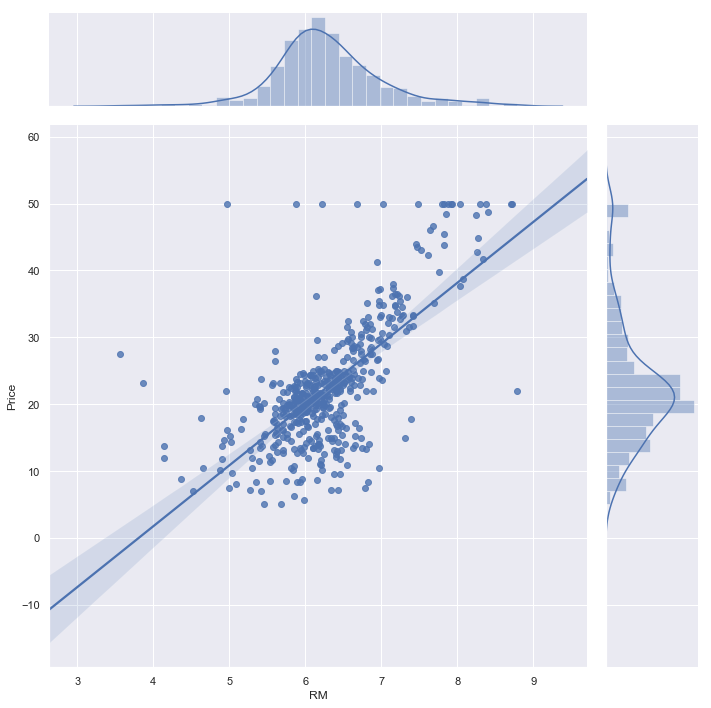

In [203]:
sns.jointplot(x=data["RM"], y=data["Price"], data=data, kind='reg', height=10)
plt.show();

As the number of rooms increases so does the price of the house. For example house with 5 rooms would have an average value of 100 000 dollars where a number of 7 rooms would cost on average 300 000 dollars. I can notice that in the graph there is some indications that the model can be inacurate: some prices seem to be stuck at 500 000 which can skew the dataset. There is also a large outlier where a house that has nearly 9 rooms costs around 210 000.

Jointplot shows us a distribution for room number that is on avg 6 to 7 rooms and there is a strong distribution of prices around 150 000 to 250 000. 

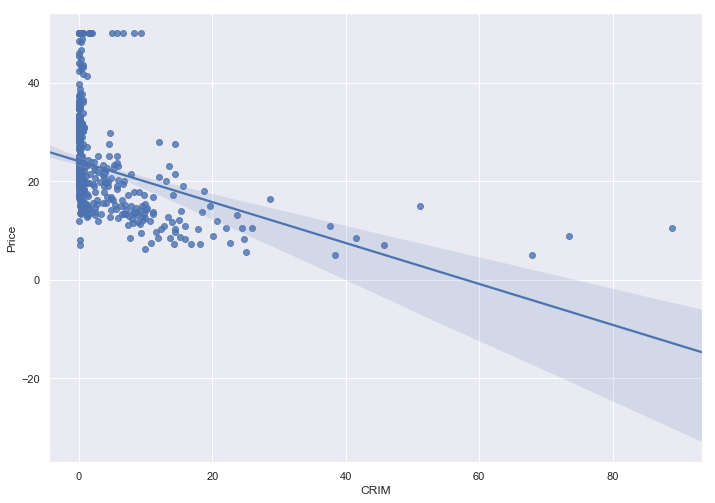

In [204]:
sns.regplot(x=data["CRIM"], y=data["Price"])

In the above graph I can see weak negative correlation of crime against house price. The right side of the graph is fairly flat indicating that above a certain treshhold, the crime rate does not have a big effect on house price. All the houses that cost above 30k are located in low crime areas (crime rate lower than 10). The relationship is not very linear. The linear regression model used is limited in its ability to describe the relationship.

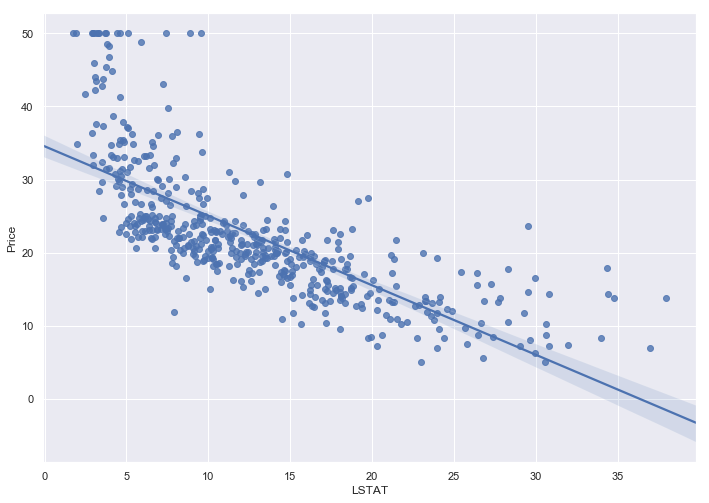

In [205]:
sns.regplot(x=data["LSTAT"], y=data["Price"])

This graph shows relationship between LSTAT and Price. It shows moderate / strong negative realtionship. All the houses above 40k are in areas where there is lower poverty rate(LSTAT less than 10). This part of the graph diviates from the trend, showing that the house prices in low poverty area are higher than the trend line predicts. The rest of the graph is more linear and more closely follows the trend line, showing stronger and more predictable correlation between house price and poverty rate.

## Analysing whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t

A significance test which also can be called hypothesis test is a tool that summarizes data about a hypthesis. Our aim is to test whether there is a differnce in a median house prices between houses that are along the river and those that are not? To perform this tets I need to convert above question into two hypothesis;
- Ho which will represent no difference in the median price between houses beside the river and those that are not 
- Ha which will represent that there is a difference in prices of houses beside and not beside the river 

My aim is to find a probability(p-value) that can reject one of the hypothesis stated above. If the p-value is less than the aplpha value then I can reject the Ho hypothesis and say prices differ whether or not they are located beside the river.

In [206]:
#creating the dataset that will only have the CHAS and Price values
ttdata = data[["CHAS", "Price"]]
ttdata.head()

,CHAS,Price
0,0.000,24.000
1,0.000,21.600
2,0.000,34.700
3,0.000,33.400
4,0.000,36.200


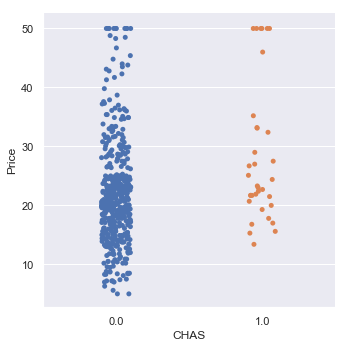

In [207]:
sns.catplot(x='CHAS', y='Price', data=ttdata)

Both groups seems to have similar ceiling. There is a larger cluster of houses prized betwen 10 000 nd 25 000 that are not lacted beside the river.

In [208]:
#median for house values beside the reiver and those that are not beside river
ttdata.pivot(columns="CHAS", values="Price").median()
#it appears that the average median price for house beside the river(1) is higher

CHAS
0.000   20.900
1.000   23.300
dtype: float64

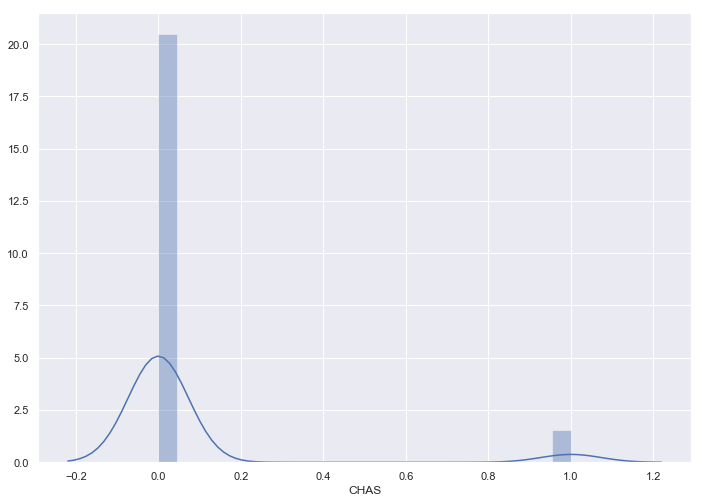

In [209]:
sns.distplot(ttdata['CHAS'])
#From the plot below we can see the binary data of 1 and 0.
#We can see significant difference in the amount of houses that are beside the river (1) and those that are not(0).

In [210]:
#to chekc this i have checked the count and yes as the graph above shows there is a huge difference
ttdata.pivot(columns="CHAS", values="Price").count()

CHAS
0.000    471
1.000     35
dtype: int64

Having two sets with hugely different amount of data can undermine the test.
In total there is 506 samples and the proprtion of houses beside the river equals to 0.93 and the proprtion of houses not beside the river equals to 0.06. In order to perform a t-test I will have to take a sample of the same amount from each category.

### Running T-Test:
In order to run t-test I have to have following assumptions
- same number of sample
- normal distribution 
- similar variance 


In [211]:
river = ttdata[ttdata["CHAS"] == 1]["Price"] #all the median house prices beside the river  
noriver = ttdata[ttdata["CHAS"] == 0]["Price"] #all the median house prices that are not located beside the river

In [212]:
#creating sample values for both categories. I will taek 20 samples from each:
x = river.head(n = 20) 
z = noriver.head(n = 20) 
#I am taking the first 20 values from both columns

In [213]:
#example of the first 20 data points that represent houses beside the river
x

142   13.400
152   15.300
154   17.000
155   15.600
160   27.000
162   50.000
163   50.000
208   24.400
209   20.000
210   21.700
211   19.300
212   22.400
216   23.300
218   21.500
219   23.000
220   26.700
221   21.700
222   27.500
234   29.000
236   25.100
Name: Price, dtype: float64

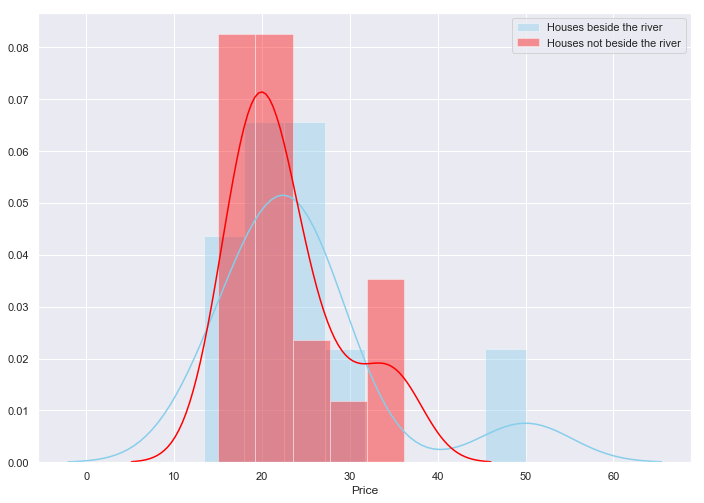

In [214]:
#checking the distribution and variance
sns.distplot(x, color="skyblue", label="Houses beside the river")
sns.distplot(z, color="red", label="Houses not beside the river")
plt.legend()

To calculate t-value:
$$ difference between group of means
_________________________________
variability of group$$

<img src="formula.png" style="width: 150px;">

In [215]:
#to mathematically calculate t-value i first have to get difference between group of means
mean1 = x.mean()
mean2 = z.mean()
group_mean = (mean1 - mean2)

#Then I am going to focus on the variability of group
#In order to get the variance i need to square the standard diviation of each group:
square1 = (x.std() * x.std())
sqaure2 = (z.std() * z.std())
#now i need to divide the squared std by the sample size
n = 20
xx = (square1 / n)
zz = (sqaure2 / n)
#then we need to add it
cc = (xx + zz)
#last step for the bottom equation is to square root the inside
root = cc**.5

#last step:
t_value = (group_mean / root)
t_value

0.7206753912774021

In order to either reject or accept already stated null hypothesis (Ho) I need to check the t_value I found against critical vlaue in the t table. As I am using a sample of 20('degrees of freedom') which equals 20 + 20 -2 which equals 38 samples and probability of 0.05. The critcal value is around 2.02 which means that when the t_value is higher than the critical value we can then reject the null hypothesis. Meaning that there is a difference in prices of houses beside and not beside the river. 
When the t_value is lower than the critcal value of 2.02 then we can accept the null hypothesis.
The result I received is 0.72 which is lower than 2.02 which means I can accept the null hypothesis which states that there is no difference in the median prices between houses beside the river and those that are not.

In [216]:
#I want to check what will I get using a build in funtion:
ss.ttest_ind(x, z)

Ttest_indResult(statistic=0.7206753912774009, pvalue=0.4755195965141473)

When the pvlaue from abouve calculation is above 0.05 we cannot reject the null hypothesis. Why we accept pvalue of 0.05? It is beacuse inferential statistics; if we were to do this sample 100 times, 95 of the times we would reject the null hypothesis and only 5 percent we wouldnt.

Also I can see that my maths equation equals the statistic value = 0.72.

Both results identify that I cannot reject null hypothesis:
<b>"There is no difference in the median prices between houses beside the river and those that are not"</b>

Both groups seems to have similar ceiling. There is a larger cluster of houses prized betwen 10 000 nd 25 000 that are not lacted beside the river.

In [217]:
#out of curisosity I wanted to see how many bedrooms houses beside the river would have
rdata = data[["CHAS", "Price", "RM"]]

In [218]:
#this shows the amount of rooms available at the houses beside the river. it tends to be largers houses between 5 to 9 bedrooms
rdata[rdata["CHAS"] == 1]

,CHAS,Price,RM
142,1.000,13.400,5.403
152,1.000,15.300,5.012
154,1.000,17.000,6.129
155,1.000,15.600,6.152
160,1.000,27.000,6.250
162,1.000,50.000,7.802
163,1.000,50.000,8.375
208,1.000,24.400,6.064
209,1.000,20.000,5.344
210,1.000,21.700,5.960


The feature with the least correlation to MV is the proximity to Charles River, CHAS

### Neural Network for Boston house prices dataset:

#### Introduction

Well-trained neural network should provide decent predictions of house prices based on the variable of the dataset. Good explanations of how to use the neural network and how it works.

Machine Learning represents a relatively new field in the world of computing that allows computers to perform abstract tasks and aproximate answers. Before this, computers could only be programmed to perform very specific tasks. Modern applications of machine learning can be seen absolutely everywhere from snapchat filters to cancer diagnoses to autonomous vehicles. 

Neural network is a system that is used to make predictions of outcomes when the system is presented with a number of inputs. The input and output variables must be correlated in some way as influence eachother. A neural net will start off with very poor proximation of the output but can be trained using training data to give more accurate results. Training data will contain both input and output data and the neural net will often use a process known as backpropagation to minimize errors. 

The term machine learning can be used to describe many different types of nueral networks. A common type of nueral network that is often used for introduction to machine learning is the multilayer perceptron which I will create in this notebook. 

Multilayer perceptron describes a neural network made of multiple layers; input layer, output layer and one or multiple hidden layers between input and output. Each layer contains several cells. The cells take inputs, multiply them by series of weights, add a bias, and passes the results to the next layer. At the end a number of outoups will be calculated. 

A technique called backpropagation is used to make the system more accurate. In this process training data is used and error is calculated after each training itteration. When the error is calculated the system will adjust the weights of the hidden layer cells to minimize the error.

<img src="MLP.png" style="width: 400px;">

#### Method

Prerequisits:
- ensure the dataset is in array form
- split the dataset into the input and output
- ~~((scale the data so the input variables haev similiar order of magnitude))
- split the dataset into training set, validation set and the test set
- training data 70%
- validation data 15%
- test data 15%
- The reason why I am splitting the dataset into training dataset and validation dataset is because with the training dataset we train the model and then we can validate the models ability on the validation dataset.


###  Inputs and outputs

In [258]:
#I will convert the dataset into arrays for the machine to process
NNdata = data.values

In [259]:
NNdata

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [260]:
#inputs
inputs = NNdata[:,0:13]

In [261]:
#outputs what we want to predict
output = NNdata[:,13]

## Scaling

In [262]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
inputs_scale = min_max_scaler.fit_transform(inputs)

###  Spliting Dataset 

val_and_test size will be 30% of the overall dataset.

In [263]:
#training and test set 
from sklearn.model_selection import train_test_split
inputs_train, inputs_val_and_test, output_train, output_val_and_test = train_test_split(inputs_scale, output, test_size=0.3)

In [264]:
#this will split the val_and_test size equally to the validation set and the test set
inputs_val, inputs_test, output_val, output_test = train_test_split(inputs_val_and_test, output_val_and_test, test_size=0.5)

Now I have 6 variables:
- inputs_train (13 input features, 70% of full dataset)
- inputs_val (13 input features, 15% of full dataset)
- inputs_test (13 input features, 15% of full dataset)
- output_train (1 label, 70% of full dataset)
- output_val (1 label, 15% of full dataset)
- output_test (1 label, 15% of full dataset)

In [265]:
#I want to see the shape of each array
print(inputs_train.shape, inputs_val.shape, inputs_test.shape, output_train.shape, output_val.shape, output_test.shape)

(354, 13) (76, 13) (76, 13) (354,) (76,) (76,)


The training set has 354 data points while teh validation and test set had 76 data points each. In total 506 data points. 

###  Building and training

To start building teh architecture, first step is to determine the structure of the neural network. Structure is how many hidden layers and how many nuerons per layer (nodes).
Smaller and simpler neural nets train faster but may not be able to accurately predict outcomes of a more complex system.
A nueral network that is too deep (too many nodes and layers) may result in overfitting. Overfitting occurs when nueral network is so complex that it can very accurately predict the training data, but the structure is so complex it is not good at generalisation; an overfitted nueral net will be very accurate for training data but will not give accuarate results for new data.

To start I will make a model with 2 hidden layers (32 neurons and 10) with ReLU and sigmoid activation and one output layer.

In this section I need to figure out which algorithm will optimize it, what loss function to use and other metrics I want to track apart form loss function.


In [328]:
m = kr.models.Sequential()

#m.add(kr.layers.Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
#after increasing teh first hidden layer to 64 I could see an improvemenet in the loss and accuracy
m.add(kr.layers.Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(10, activation="sigmoid"))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))

In [329]:
m.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy'])
# I want to track accuracy on top of the loss function
# ‘sgd’ refers to stochastic gradient descent

In [330]:
#here I am training on the training data for 100 epochs and the validation data
history = m.fit(inputs_train, output_train,
          batch_size=32, epochs=100)

#m.fit(inputs_train, output_train,
          #batch_size=32, epochs=100,
          #validation_data=(inputs_val, output_val))

Epoch 1/100
354/354 [==============================] - 0s 849us/step - loss: 302.2970 - accuracy: 0.0028
Epoch 2/100
354/354 [==============================] - 0s 77us/step - loss: 89.3615 - accuracy: 0.0169
Epoch 3/100
354/354 [==============================] - 0s 84us/step - loss: 91.7789 - accuracy: 0.0085
Epoch 4/100
354/354 [==============================] - 0s 76us/step - loss: 88.3466 - accuracy: 0.0113
Epoch 5/100
354/354 [==============================] - 0s 76us/step - loss: 85.7958 - accuracy: 0.0198
Epoch 6/100
354/354 [==============================] - 0s 87us/step - loss: 72.3671 - accuracy: 0.0056
Epoch 7/100
354/354 [==============================] - 0s 78us/step - loss: 60.2509 - accuracy: 0.0028
Epoch 8/100
354/354 [==============================] - 0s 67us/step - loss: 53.2430 - accuracy: 0.0113
Epoch 9/100
354/354 [==============================] - 0s 74us/step - loss: 48.0805 - accuracy: 0.0113
Epoch 10/100
354/354 [==============================] - 0s 78us/step - 

354/354 [==============================] - 0s 59us/step - loss: 15.4738 - accuracy: 0.0085
Epoch 80/100
354/354 [==============================] - 0s 67us/step - loss: 12.4049 - accuracy: 0.0198
Epoch 81/100
354/354 [==============================] - 0s 56us/step - loss: 13.0164 - accuracy: 0.0169
Epoch 82/100
354/354 [==============================] - 0s 55us/step - loss: 13.4749 - accuracy: 0.0085
Epoch 83/100
354/354 [==============================] - 0s 74us/step - loss: 35.7406 - accuracy: 0.0254
Epoch 84/100
354/354 [==============================] - 0s 80us/step - loss: 13.3185 - accuracy: 0.0085
Epoch 85/100
354/354 [==============================] - 0s 78us/step - loss: 15.2993 - accuracy: 0.0113
Epoch 86/100
354/354 [==============================] - 0s 67us/step - loss: 13.6497 - accuracy: 0.0141
Epoch 87/100
354/354 [==============================] - 0s 91us/step - loss: 23.8226 - accuracy: 0.0085
Epoch 88/100
354/354 [==============================] - 0s 80us/step - loss: 

Looking at the numbers I can see that the loss is decreasing and accuracy is increasing wiht each epoch.

In [331]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


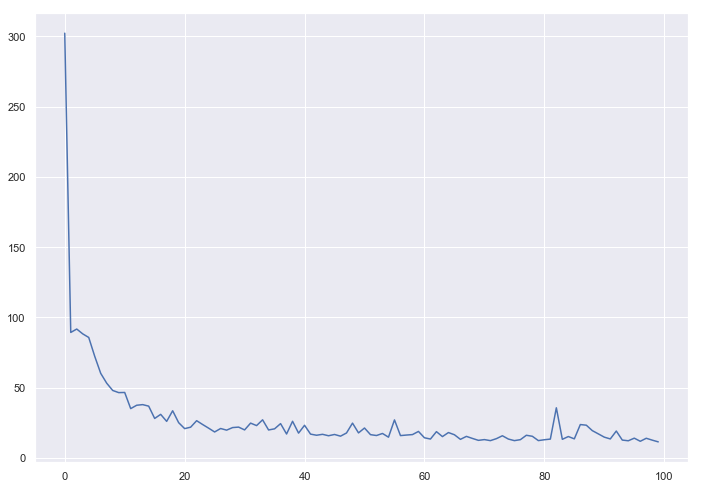

In [332]:
#we can see here how loss has decreased but its not there is some hiccups
plt.plot(history.history['loss'])

In [333]:
m.evaluate(inputs_test, output_test) #evaluation the model on the test set. This shows us th accuracy on our test 

76/76 [==============================] - 0s 1ms/step


[18.23162300963151, 0.02631578966975212]

In [334]:
m.predict(inputs_train).round().T

array([[45., 22., 29., 13., 19., 30., 14., 49., 21., 25., 34., 13., 40.,
        42., 30., 18., 19., 10., 35., 12., 22., 21., 22., 42., 12., 21.,
        31., 18., 15., 25., 13., 21., 21., 13., 21., 16., 36., 13., 18.,
        27., 21., 30., 30., 17., 22., 44., 23., 21., 36., 15., 23., 46.,
        18., 47., 32., 27., 22., 15., 31., 11., 32., 25., 23., 23., 21.,
        20., 23., 34., 36., 26., 25., 12., 19., 25., 19., 13., 22., 20.,
        22., 23., 23., 21., 24., 28., 21., 20., 17., 28., 32., 15., 40.,
        21., 17., 17., 21., 21., 23., 22., 22., 13., 34., 20., 16., 20.,
        35., 22., 20., 27., 21., 21., 21., 21., 14., 26., 28., 14., 17.,
        16., 21., 18., 22., 21., 11., 31., 11., 23., 22., 35., 11., 22.,
        22., 15., 15., 16., 22., 22., 19., 37., 15., 21., 12., 25., 19.,
        15., 22., 24., 25., 11., 25., 11., 26., 47., 20., 21., 22., 24.,
        37., 27., 16., 20., 15., 15., 22., 23., 19., 23., 20., 19., 14.,
        34., 22., 23., 24., 12., 25., 36., 23., 22.

In [335]:
output_train

array([44.8, 21.9, 23.6, 11.3, 23. , 36.2, 11.5, 50. , 20.9, 22.6, 31. ,
       13.8, 33.3, 43.1, 37. , 14.2, 18.8, 17.9, 34.9,  5.6, 26.5, 20.4,
       19.8, 50. ,  9.5, 22.8, 33.4, 20.1,  8.5, 28.7, 13.3, 24.4, 20.3,
        8.3, 19.9, 17.3, 42.8, 12.3, 15. , 29.8, 20.6, 32.9, 29.8, 14.5,
       23.1, 46. , 22.8, 19. , 34.9, 13.3, 23.4, 48.5, 18.9, 50. , 50. ,
       21.2, 22.3, 13.1, 26.6,  7.4, 28.5, 23.7, 22.9, 23.9, 19.2, 20.1,
       24.4, 37.2, 34.6, 20.6, 26.7, 13.4, 18.2, 24.4, 17.5, 13.1, 22.4,
       18.2, 20.8, 22.3, 23. , 18.5, 24.2, 30.7, 17.1, 18.5, 23.1, 27.9,
       30.3, 14.1, 36. , 20. , 13.9, 16.2, 22.5, 22.9, 28.1, 22.8, 23.8,
       14.6, 31.5, 22. , 23.2, 18.3, 37.3, 22. , 19.3, 22.7, 21. , 22.2,
       21.1, 15.3, 15.6, 28. , 24.3, 12.7, 15.2, 15.4, 16.2, 16.4, 23.3,
       20.6,  8.3, 28.7,  8.8, 23.1, 22.6, 33.8,  7.5, 22.9, 19.3, 13.3,
       13.4, 14.9, 20.7, 21.2, 27.1, 21.9, 19.1, 24.3,  8.4, 25.2, 14.5,
        7.2, 21.4, 25. , 24.7, 10.5, 23.3,  8.8, 25

In [340]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

NameError: name 'hist' is not defined

refrence:
nueral net explanation - intro- https://skymind.ai/wiki/neural-network

https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

https://www.curiousily.com/posts/tensorflow-2-and-keras-quick-start-guide/

https://www.tensorflow.org/guide/keras/train_and_evaluate

explanation / defenitions of the code pararmeters used \https://keras.io/models/sequential/

https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

heatmaps - https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

http://www.sthda.com/english/wiki/t-test-formula - t test formula


dodaj ref z jego listy z moodles

https://www.youtube.com/watch?v=T91fsaG2L0s